In [23]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 기본 테마 설정
# https://coldbrown.co.kr/2023/07/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%8B%A4%EC%A0%84%ED%8E%B8-08-seaborn-sns-set%EC%9D%84-%ED%86%B5%ED%95%B4-%EC%8A%A4%ED%83%80%EC%9D%BC-%EC%84%A4%EC%A0%95%ED%95%98%EA%B8%B0/
sns.set()

# 그래프 기본 설정
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 복잡한 통계 처리를 위한 라이브러리
from scipy import stats

In [24]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 윈도우 기본 한글 폰트 설정 (예: 'Malgun Gothic')
plt.rc('font', family='Malgun Gothic')

# 마이너스 부호 깨지는 것도 방지
plt.rcParams['axes.unicode_minus'] = False

### 데이터 불러오기

In [26]:
df = pd.read_csv('Pizza Sales Dataset.csv')
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_day,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,1/1/2015,Thursday,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,1/1/2015,Thursday,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,1/1/2015,Thursday,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,1/1/2015,Thursday,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,1/1/2015,Thursday,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [27]:
df.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_day', 'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

### 컬럼명 한국어로 바꾸기

In [29]:
df.rename(columns={
    'pizza_id': '피자 ID',
    'order_id': '주문 ID',
    'pizza_name_id': '피자 이름 ID',
    'quantity': '주문 수량',
    'order_date': '주문 날짜',
    'order_day': '주문 요일',
    'order_time': '주문 시간',
    'unit_price': '단가',
    'total_price': '총액',
    'pizza_size': '피자 사이즈',
    'pizza_category': '피자 종류',
    'pizza_ingredients': '피자 재료 목록',
    'pizza_name': '피자 이름'
}, inplace=True)

In [30]:
# 결측치 확인 : 없음
df.isna().sum()

피자 ID       0
주문 ID       0
피자 이름 ID    0
주문 수량       0
주문 날짜       0
주문 요일       0
주문 시간       0
단가          0
총액          0
피자 사이즈      0
피자 종류       0
피자 재료 목록    0
피자 이름       0
dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   피자 ID     48620 non-null  int64  
 1   주문 ID     48620 non-null  int64  
 2   피자 이름 ID  48620 non-null  object 
 3   주문 수량     48620 non-null  int64  
 4   주문 날짜     48620 non-null  object 
 5   주문 요일     48620 non-null  object 
 6   주문 시간     48620 non-null  object 
 7   단가        48620 non-null  float64
 8   총액        48620 non-null  float64
 9   피자 사이즈    48620 non-null  object 
 10  피자 종류     48620 non-null  object 
 11  피자 재료 목록  48620 non-null  object 
 12  피자 이름     48620 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 4.8+ MB


### 분석 시작

1. 날짜/시간 데이터 정리 주문 날짜, 주문 시간 datetime 타입으로 변환

In [72]:
# 날짜 + 시간 합쳐서 datetime 열 만들기
df['주문일시'] = pd.to_datetime(df['주문 날짜'] + ' ' + df['주문 시간'])

# 요일도 숫자로 변경
# 영어 요일 → 한글 매핑
요일_매핑 = {
    'Monday': '월요일',
    'Tuesday': '화요일',
    'Wednesday': '수요일',
    'Thursday': '목요일',
    'Friday': '금요일',
    'Saturday': '토요일',
    'Sunday': '일요일'
}

df['주문 요일'] = df['주문 요일'].map(요일_매핑)

# 순서 설정
요일_순서 = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']
df['주문 요일'] = pd.Categorical(df['주문 요일'], categories=요일_순서, ordered=True)

df['요일_번호'] = df['주문일시'].dt.dayofweek  # 월=0 ~ 일=6
df['시간대'] = df['주문일시'].dt.hour

In [58]:
# '시간대' 컬럼을 기준으로 주문 수 세기
시간대별_주문량 = df['시간대'].value_counts().sort_index()
print(시간대별_주문량)

시간대
9        4
10      17
11    2672
12    6543
13    6203
14    3521
15    3170
16    4185
17    5143
18    5359
19    4350
20    3487
21    2528
22    1370
23      68
Name: count, dtype: int64


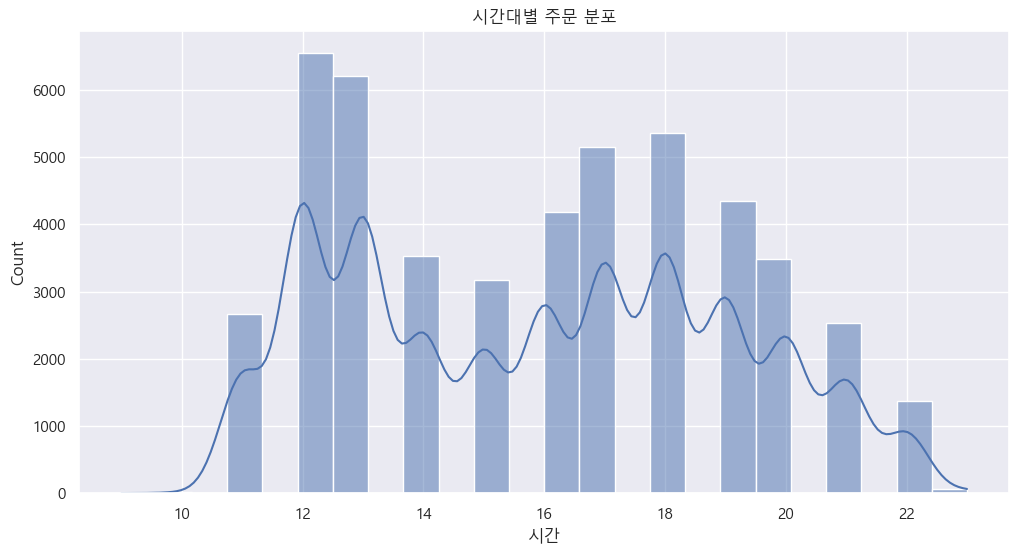

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# 시간대별 주문량
sns.histplot(df['시간대'], bins=24, kde=True)
plt.title('시간대별 주문 분포')
plt.xlabel('시간')
plt.show()

In [74]:
# '주문 요일' 컬럼을 기준으로 주문 수 세기 (요일 순서 보장)
요일별_주문량 = df['주문 요일'].value_counts().reindex(요일_순서)
print(요일별_주문량)

주문 요일
월요일    0
화요일    0
수요일    0
목요일    0
금요일    0
토요일    0
일요일    0
Name: count, dtype: int64


### 2. 📅 **요일별 주문량 분석 (주말 특수 여부)**

- **목표**: 피자 수요는 주중 vs 주말 어떻게 다른가?
- **시각화**: `order_day` (= `주문 요일`) 기준 막대 그래프
- **활용**: 주말 집중 마케팅 or 할인 전략 근거

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anacond

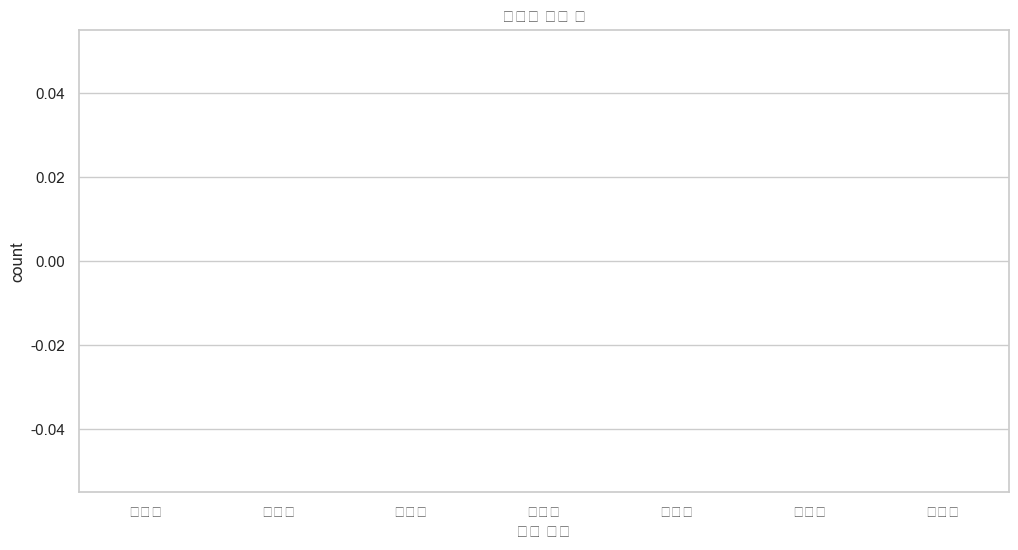

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# 요일별 주문 수
sns.countplot(data=df, x='주문 요일', order=['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일'])
plt.title('요일별 주문 수')
plt.show()

2. 피자 종류별 주문수량, 사이즈별 평균 총액

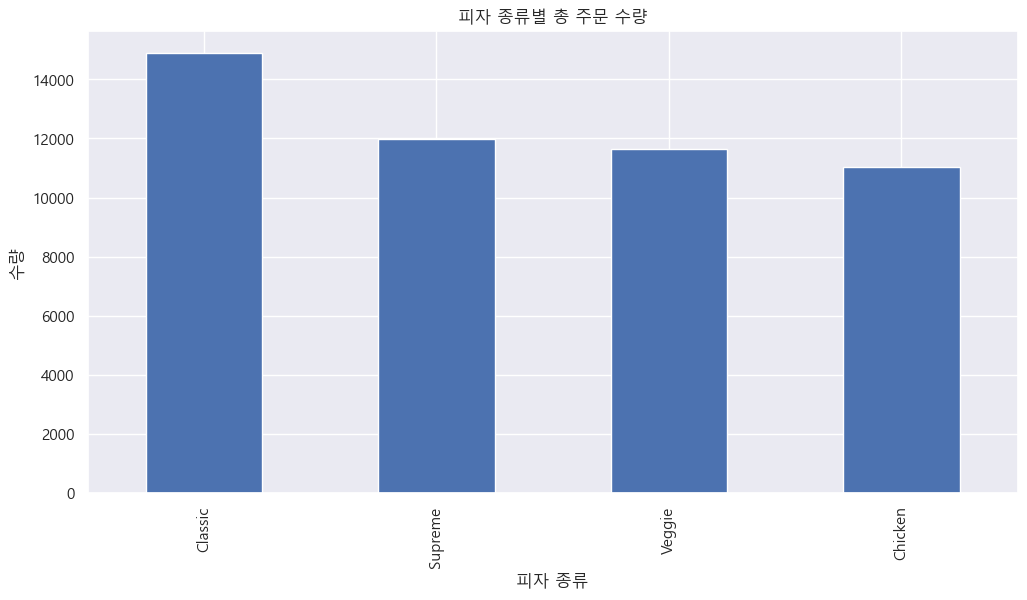

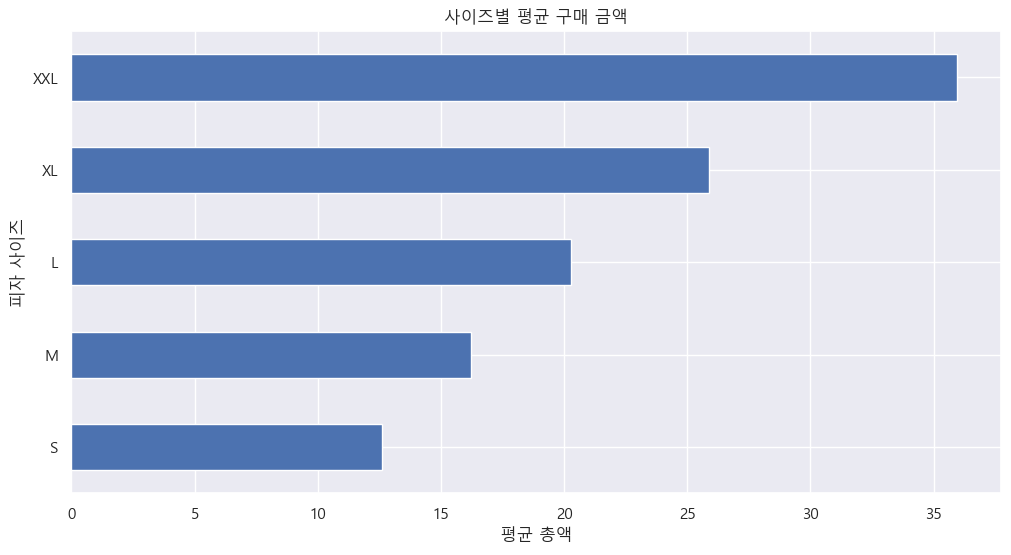

In [37]:
# 피자 종류별 총 주문 수량
df.groupby('피자 종류')['주문 수량'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('피자 종류별 총 주문 수량')
plt.ylabel('수량')
plt.show()

# 피자 사이즈별 평균 총액
df.groupby('피자 사이즈')['총액'].mean().sort_values().plot(kind='barh')
plt.title('사이즈별 평균 구매 금액')
plt.xlabel('평균 총액')
plt.show()

1. 요일별+시간대별 주문량
- 요일과 시간대별 주문이 몰리는 패턴 시각화 가능
- '언제' 주문이 집중되는지 파악. 마케팅 타이밍, 인력배치, 프로모션 시간 설정

2. 피자 종류/사이즈별 판매량
- '무엇' 이 잘 팔리는지 파악. 인기메뉴 집중, 재고 및 가격정책, 메뉴개선방향? 설정??

3. 가설 설정
- 대형 사이즈 피자는 저녁에 팔림 > 피자 사이즈별 시간대 히트맵
- 특정 요일에 특정 피자종류 > 요일 vs 피자 종류 크로스탭(?)
- 매출이 주로 몇 개 피자에 집중되어 있다? > 총액 기준 상위메뉴 추출

4. 마케팅 제안~~~
- 수요일 오후는 주문량이 낮으니 “1+1 이벤트” 진행
- 점심엔 M 사이즈, 저녁엔 L 사이즈를 강조 
- 인기 없는 피자 → 재료 조합 바꾸거나 묶음 할인 ㅇㅇㅇㅇㅇ

### 1. 시간대별 주문량 분석 (피크타임 파악)

In [40]:
# 시간 추출
df['order_hour'] = pd.to_datetime(df['주문 시간']).dt.hour

# 시간대별 주문량 집계
hourly_order_counts = df['order_hour'].value_counts().sort_index()
print(hourly_order_counts)

C:\Users\덕환\AppData\Local\Temp\ipykernel_16988\1793557668.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['order_hour'] = pd.to_datetime(df['주문 시간']).dt.hour


order_hour
9        4
10      17
11    2672
12    6543
13    6203
14    3521
15    3170
16    4185
17    5143
18    5359
19    4350
20    3487
21    2528
22    1370
23      68
Name: count, dtype: int64


### 2. 요일대별 주문량 데이터 확인

In [55]:
# 요일 순서 정렬
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['주문 요일'] = pd.Categorical(df['주문 요일'], categories=days_order, ordered=True)

# 요일별 주문량 집계
weekday_order_counts = df['주문 요일'].value_counts().sort_index()
print(weekday_order_counts)

주문 요일
Monday       0
Tuesday      0
Wednesday    0
Thursday     0
Friday       0
Saturday     0
Sunday       0
Name: count, dtype: int64
